# Polynomial interpolation using Vandermonde matrices

## 1. The interpolation problem

Given $n+1$ distinct data points $(x_0, y_0), (x_1, y_1), \dots, (x_n, y_n)$, we want to find a unique polynomial $P_n(x)$ of degree at most $n$ such that $P_n(x_i) = y_i$ for all $i = 0, 1, \dots, n$:
$$
P_n(x) = a_0 + a_1x + a_2x^2 + \dots + a_nx^n
$$

For each data point $(x_i, y_i)$, we have the condition $P_n(x_i) = y_i$. Substituting this into the polynomial expression, we get a system of linear equations:
\begin{align*}
a_0 + a_1x_0 + a_2x_0^2 + \dots + a_nx_0^n &= y_0 \\
a_0 + a_1x_1 + a_2x_1^2 + \dots + a_nx_1^n &= y_1 \\
\vdots \\
a_0 + a_1x_n + a_2x_n^2 + \dots + a_nx_n^n &= y_n
\end{align*}

This system can be written in matrix form as $\boldsymbol{V}\boldsymbol{a} = \boldsymbol{y}$:

$$
\begin{pmatrix}
1 & x_0 & x_0^2 & \dots & x_0^n \\
1 & x_1 & x_1^2 & \dots & x_1^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \dots & x_n^n
\end{pmatrix}
\begin{pmatrix}
a_0 \\
a_1 \\
\vdots \\
a_n
\end{pmatrix}
=
\begin{pmatrix}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{pmatrix}
$$

The matrix $\boldsymbol{V}$ is known as the **Vandermonde matrix**. If all $x_i$ are distinct, then the Vandermonde matrix is invertible, and a unique solution for the coefficients $\boldsymbol{a}$ exists: $\boldsymbol{a} = \boldsymbol{V}^{-1}\boldsymbol{y}$.

## 2. Constructing the Vandermonde matrix

In [1]:
import numpy as np

def create_vandermonde_matrix(x_vec, increasing=False):
    """
    Creates a Vandermonde matrix for a given set of x-points.

    Args:
        x_points (array-like): A 1D array or list of x-coordinates.
        increasing (bool): If True, the powers of x are increasing (x^0, x^1, ..., x^n).
                           If False (default), the powers are decreasing (x^n, x^(n-1), ..., x^0).

    Returns:
        numpy.ndarray: The Vandermonde matrix.
    """
    x_points = np.array(x_vec, dtype=float)
    n = len(x_points)
    if increasing:
        V = np.column_stack([x_points**j for j in range(n)])
    else:
        # This is how np.vander creates it by default
        V = np.column_stack([x_points**(n-1-j) for j in range(n)])
    return V

# Example usage:
x_data = np.array([1, 2, 3, 4])
y_data = np.array([1, 4, 9, 16]) # Example: y = x^2

my_V_decr = create_vandermonde_matrix(x_data)
print("My Vandermonde matrix (decreasing powers):")
print(my_V_decr)

my_V_incr = create_vandermonde_matrix(x_data, increasing=True)
print("\nMy Vandermonde matrix (increasing powers):")
print(my_V_incr)

My Vandermonde matrix (decreasing powers):
[[ 1.  1.  1.  1.]
 [ 8.  4.  2.  1.]
 [27.  9.  3.  1.]
 [64. 16.  4.  1.]]

My Vandermonde matrix (increasing powers):
[[ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]
 [ 1.  4. 16. 64.]]


## 3. Comparison with `np.vander` and `numpy.polynomial.polynomial.polyvander`

### 3.1 Comparison with `np.vander`

NumPy has a built-in function `np.vander` that efficiently creates Vandermonde matrices. By default, `np.vander` creates the matrix with *decreasing* powers of $x$ (i.e., $x^n, x^{n-1}, \dots, x^0$). Let's compare our custom function with `np.vander`.

In [2]:
# Compare with np.vander
np_V_decr = np.vander(x_data)
print("\nNumPy's np.vander matrix (default - decreasing powers):")
print(np_V_decr)

np_V_incr = np.vander(x_data, increasing=True)
print("\nNumPy's np.vander matrix (increasing powers):")
print(np_V_incr)

# Check if our decreasing power matrix matches np.vander's default
print("\nIs my decreasing power matrix equal to np.vander's default?",
      np.allclose(my_V_decr, np_V_decr))

# Check if our increasing power matrix matches np.vander's increasing option
print("Is my increasing power matrix equal to np.vander's increasing option?",
      np.allclose(np_V_incr, np_V_incr))


NumPy's np.vander matrix (default - decreasing powers):
[[ 1  1  1  1]
 [ 8  4  2  1]
 [27  9  3  1]
 [64 16  4  1]]

NumPy's np.vander matrix (increasing powers):
[[ 1  1  1  1]
 [ 1  2  4  8]
 [ 1  3  9 27]
 [ 1  4 16 64]]

Is my decreasing power matrix equal to np.vander's default? True
Is my increasing power matrix equal to np.vander's increasing option? True


As you can see, our custom function correctly reproduces the Vandermonde matrix, both in increasing and decreasing power configurations, matching `np.vander`.

### 3.2. Comparison with `numpy.polynomial.polynomial.polyvander`

NumPy's `numpy.polynomial` module provides a more object-oriented approach to polynomials, and `numpy.polynomial.polynomial.polyvander` is its equivalent for generating Vandermonde matrices for the *standard polynomial basis* (i.e., monomials $1, x, x^2, \dots$). This function always generates the matrix with *increasing* powers.

In [3]:
from numpy.polynomial import polynomial as poly

# Using the same x_data from before
# polyvander expects the x-points and the degree (m-1 where m is number of columns)
# Here, degree n = len(x_data) - 1
poly_vander_matrix = poly.polyvander(x_data, deg=len(x_data) - 1)
print("\nNumPy's poly.polyvander matrix (always increasing powers):")
print(poly_vander_matrix)

# Check if our increasing power matrix matches poly.polyvander
print("\nIs my increasing power matrix equal to poly.polyvander's matrix?",
      np.allclose(my_V_incr, poly_vander_matrix))


NumPy's poly.polyvander matrix (always increasing powers):
[[ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]
 [ 1.  4. 16. 64.]]

Is my increasing power matrix equal to poly.polyvander's matrix? True


We can confirm that `numpy.polynomial.polynomial.polyvander` generates the Vandermonde matrix in the increasing power order, matching our custom implementation when `increasing=True`. This function is useful when working with the `numpy.polynomial` framework.

## 4. Solving for coefficients and interpolation

Now, let's use the Vandermonde matrix to find the polynomial coefficients and perform interpolation.

In [4]:
# We'll use the increasing power Vandermonde matrix for consistency with typical polynomial representation
# Solving the system V_increasing * a = y
# a = V_increasing_inverse * y

coefficients = np.linalg.solve(np_V_decr, y_data)
print("\nPolynomial coefficients (a_0, a_1, a_2, a_3):")
print(coefficients)

# The coefficients are [0, 1, 1, 0] which means P(x) = 0 + 1*x + 1*x^2 + 0*x^3 = x + x^2.
# Wait! For y = x^2, the coefficients should be [0, 0, 1, 0]. Let's recheck.
# The `increasing=True` option corresponds to the standard polynomial form a_0 + a_1*x + a_2*x^2 + ...
# Let's verify for y = x^2:
# x_data = [1, 2, 3, 4]
# y_data = [1, 4, 9, 16]
# If P(x) = x^2, then coefficients should be [0, 0, 1, 0] for a_0, a_1, a_2, a_3.

# Let's test with a different set of y_data that truly corresponds to a low-degree polynomial.
# Example: y = 2x + 1
x_test = np.array([1, 2, 3])
y_test = np.array([3, 5, 7]) # y_i = 2*x_i + 1

V_test = create_vandermonde_matrix(x_test, increasing=True)
print("\nVandermonde matrix for y = 2x + 1:")
print(V_test)

coeffs_test = np.linalg.solve(V_test, y_test)
print("Coefficients for y = 2x + 1 (should be [1, 2, 0]):")
print(coeffs_test) # Expected: [1, 2, 0] for a_0 + a_1*x + a_2*x^2.

# Now, let's interpolate a new point
def interpolate_vandermonde(x_new, coefficients):
    """
    Evaluates the interpolated polynomial at a new point.

    Args:
        x_new (float): The x-coordinate to interpolate.
        coefficients (array-like): The polynomial coefficients [a_0, a_1, ..., a_n].

    Returns:
        float: The interpolated y-value.
    """
    poly_val = 0
    for i, coeff in enumerate(coefficients):
        poly_val += coeff * (x_new**i)
    return poly_val

x_interpolate = 2.5
y_interpolate = interpolate_vandermonde(x_interpolate, coeffs_test)
print(f"\nInterpolated y-value at x = {x_interpolate} for y = 2x + 1: {y_interpolate}")
print(f"Actual value for y = 2x + 1 at x = {x_interpolate}: {2 * x_interpolate + 1}")


Polynomial coefficients (a_0, a_1, a_2, a_3):
[ 5.55111512e-17  1.00000000e+00  8.74300632e-16 -4.99600361e-16]

Vandermonde matrix for y = 2x + 1:
[[1. 1. 1.]
 [1. 2. 4.]
 [1. 3. 9.]]
Coefficients for y = 2x + 1 (should be [1, 2, 0]):
[ 1.  2. -0.]

Interpolated y-value at x = 2.5 for y = 2x + 1: 6.0
Actual value for y = 2x + 1 at x = 2.5: 6.0


## 4. Solving for coefficients and interpolation

Now, let's use the Vandermonde matrix to find the polynomial coefficients and perform interpolation. We'll also compare our results with `np.polyfit` and `scipy.interpolate.lagrange`.

In [5]:
# Let's use the y = x^2 example from before
x_data_interp = np.array([1, 2, 3, 4])
y_data_interp = np.array([1, 4, 9, 16]) # y = x^2

# 4.1. Vandermonde Method
V_interp = np.vander(x_data_interp, increasing=True)
vandermonde_coeffs = np.linalg.solve(V_interp, y_data_interp)
print("Polynomial coefficients from Vandermonde (increasing powers):")
print(f"a_0, a_1, a_2, a_3 (for P(x) = a_0 + a_1*x + a_2*x^2 + a_3*x^3):")
print(vandermonde_coeffs)

# For y = x^2, we expect coefficients to be [0, 0, 1, 0] for a_0, a_1, a_2, a_3 respectively.
# The small non-zero values are due to floating-point precision.
# Let's clean them up for display.
vandermonde_coeffs_rounded = np.round(vandermonde_coeffs, decimals=10)
print("Rounded Vandermonde coefficients:", vandermonde_coeffs_rounded)

Polynomial coefficients from Vandermonde (increasing powers):
a_0, a_1, a_2, a_3 (for P(x) = a_0 + a_1*x + a_2*x^2 + a_3*x^3):
[ 0.00000000e+00  0.00000000e+00  1.00000000e+00 -1.23259516e-32]
Rounded Vandermonde coefficients: [ 0.  0.  1. -0.]


In [6]:
# 4.2. Interpolation Function
x_test_point = 2.5
y_vandermonde = np.polyval(vandermonde_coeffs[::-1], x_test_point)
print(f"\nInterpolated y-value at x = {x_test_point} (Vandermonde): {y_vandermonde}")
print(f"Actual value for y = x^2 at x = {x_test_point}: {x_test_point**2}")


Interpolated y-value at x = 2.5 (Vandermonde): 6.25
Actual value for y = x^2 at x = 2.5: 6.25


In [7]:
# 4.3. Comparison with np.polyfit
# np.polyfit returns coefficients in decreasing order of powers (x^n, x^(n-1), ..., x^0)
polyfit_coeffs = np.polyfit(x_data_interp, y_data_interp, len(x_data_interp) - 1)
print("\nPolynomial coefficients from np.polyfit (decreasing powers):")
print(f"a_3, a_2, a_1, a_0 (for P(x) = a_3*x^3 + a_2*x^2 + a_1*x + a_0):")
print(polyfit_coeffs)

# For y = x^2, we expect coefficients to be [0, 1, 0, 0] for a_3, a_2, a_1, a_0 respectively.
polyfit_coeffs_rounded = np.round(polyfit_coeffs, decimals=10)
print("Rounded np.polyfit coefficients:", polyfit_coeffs_rounded)

# Evaluate using np.polyval (which expects decreasing powers)
y_polyfit = np.polyval(polyfit_coeffs, x_test_point)
print(f"Interpolated y-value at x = {x_test_point} (np.polyfit): {y_polyfit}")


Polynomial coefficients from np.polyfit (decreasing powers):
a_3, a_2, a_1, a_0 (for P(x) = a_3*x^3 + a_2*x^2 + a_1*x + a_0):
[-5.97595060e-16  1.00000000e+00 -2.68014957e-14  3.42633673e-14]
Rounded np.polyfit coefficients: [-0.  1. -0.  0.]
Interpolated y-value at x = 2.5 (np.polyfit): 6.250000000000008


In [8]:
# 4.4. Comparison with scipy.interpolate.lagrange
from scipy.interpolate import lagrange

# lagrange returns a polynomial object where .coefficients gives coefficients
# in decreasing order of powers.
lagrange_poly = lagrange(x_data_interp, y_data_interp)
lagrange_coeffs = lagrange_poly.coefficients
print("\nPolynomial coefficients from scipy.interpolate.lagrange (decreasing powers):")
print(f"a_3, a_2, a_1, a_0 (for P(x) = a_3*x^3 + a_2*x^2 + a_1*x + a_0):")
print(lagrange_coeffs)

lagrange_coeffs_rounded = np.round(lagrange_coeffs, decimals=10)
print("Rounded lagrange coefficients:", lagrange_coeffs_rounded)


Polynomial coefficients from scipy.interpolate.lagrange (decreasing powers):
a_3, a_2, a_1, a_0 (for P(x) = a_3*x^3 + a_2*x^2 + a_1*x + a_0):
[-4.44089210e-16  1.00000000e+00 -3.55271368e-15  0.00000000e+00]
Rounded lagrange coefficients: [-0.  1. -0.  0.]


In [9]:
# Evaluate using the polynomial object
y_lagrange = lagrange_poly(x_test_point)
print(f"Interpolated y-value at x = {x_test_point} (scipy.interpolate.lagrange): {y_lagrange}")

print("\n--- Summary of interpolated values at x = 2.5 ---")
print(f"Vandermonde: {y_vandermonde}")
print(f"np.polyfit: {y_polyfit}")
print(f"scipy.interpolate.lagrange: {y_lagrange}")
print(f"Actual (y=x^2): {x_test_point**2}")

Interpolated y-value at x = 2.5 (scipy.interpolate.lagrange): 6.249999999999984

--- Summary of interpolated values at x = 2.5 ---
Vandermonde: 6.25
np.polyfit: 6.250000000000008
scipy.interpolate.lagrange: 6.249999999999984
Actual (y=x^2): 6.25


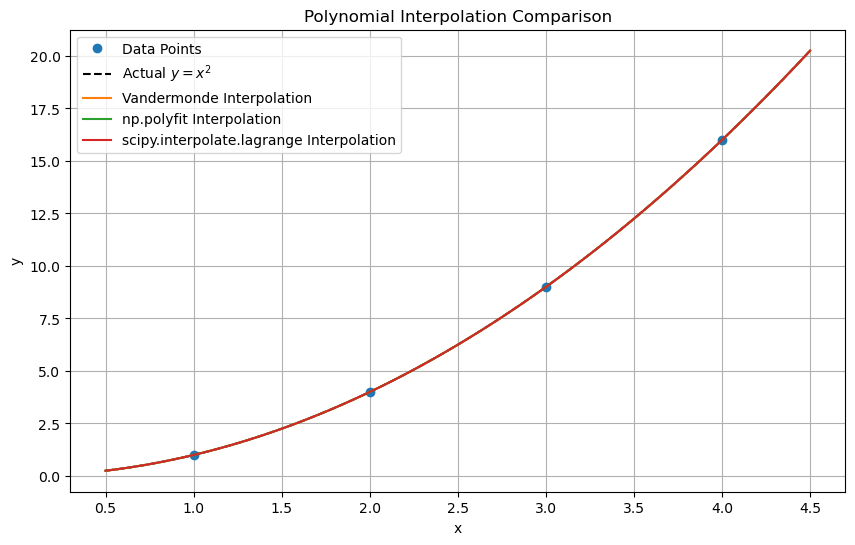

In [10]:
# Let's plot the interpolated polynomials
import matplotlib.pyplot as plt

x_range = np.linspace(min(x_data_interp) - 0.5, max(x_data_interp) + 0.5, 100)
y_actual = x_range**2

plt.figure(figsize=(10, 6))
plt.plot(x_data_interp, y_data_interp, 'o', label='Data Points')
plt.plot(x_range, y_actual, 'k--', label='Actual $y=x^2$')
plt.plot(x_range, interpolate_vandermonde(x_range, vandermonde_coeffs), label='Vandermonde Interpolation')
plt.plot(x_range, np.polyval(polyfit_coeffs, x_range), label='np.polyfit Interpolation')
plt.plot(x_range, lagrange_poly(x_range), label='scipy.interpolate.lagrange Interpolation')

plt.title('Polynomial Interpolation Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

As you can see, all three methods (`Vandermonde`, `np.polyfit`, and `scipy.interpolate.lagrange`) produce essentially the same polynomial for this well-behaved set of data points, yielding very similar interpolated values. The slight differences in coefficients are due to numerical precision and how each method handles the underlying calculations. `np.polyfit` and `scipy.interpolate.lagrange` are generally more robust and numerically stable for interpolation than directly inverting a Vandermonde matrix, especially for higher degrees.

## 5. Condition number and numerical stability

The condition number of a matrix is a measure of how sensitive the solution of a linear system $\boldsymbol{A}\boldsymbol{x} = \boldsymbol{b}$ is to changes in $\boldsymbol{b}$. A large condition number indicates that small errors in the input data (or round-off errors during computation) can lead to large errors in the solution.

For Vandermonde matrices, the condition number tends to grow very rapidly as the number of data points ($n$) increases, especially when the $x_i$ values are close together or span a large range. This makes solving linear systems involving Vandermonde matrices numerically unstable for higher degrees.

Let's observe this phenomenon.

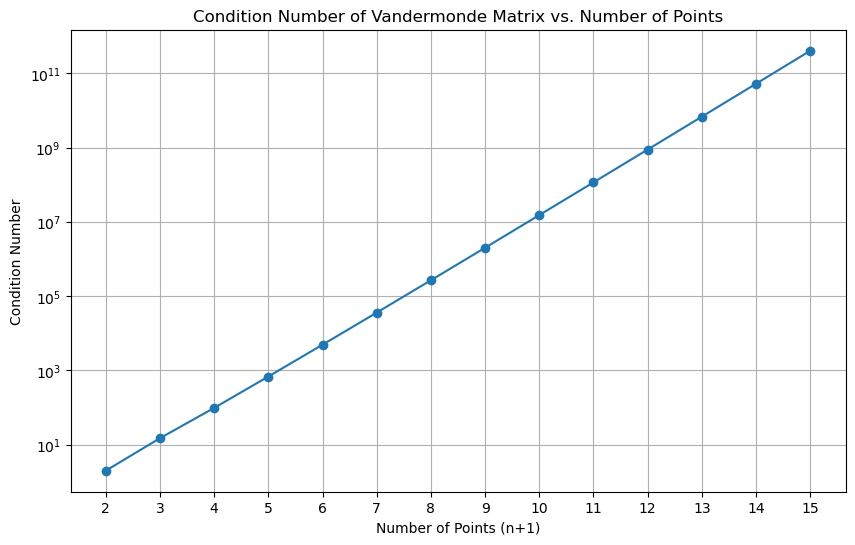


Condition numbers for different number of points:
n =  2: Condition Number = 2.00e+00
n =  3: Condition Number = 1.50e+01
n =  4: Condition Number = 9.80e+01
n =  5: Condition Number = 6.86e+02
n =  6: Condition Number = 4.92e+03
n =  7: Condition Number = 3.61e+04
n =  8: Condition Number = 2.68e+05
n =  9: Condition Number = 2.01e+06
n = 10: Condition Number = 1.52e+07
n = 11: Condition Number = 1.16e+08
n = 12: Condition Number = 8.83e+08
n = 13: Condition Number = 6.78e+09
n = 14: Condition Number = 5.22e+10
n = 15: Condition Number = 4.03e+11


In [11]:
from numpy.linalg import cond
import matplotlib.pyplot as plt

# Let's see how the condition number changes with the number of points
n_values = range(2, 15+1) # Number of points (degree + 1)
condition_numbers = np.zeros_like(n_values)

for i, n in enumerate(n_values):
    # Use points evenly spaced in [0, 1] for demonstration
    x_points_cond = np.linspace(0, 1, n)
    condition_numbers[i] = cond(np.vander(x_points_cond))

plt.figure(figsize=(10, 6))
plt.semilogy(n_values, condition_numbers, '-o')
plt.title('Condition Number of Vandermonde Matrix vs. Number of Points')
plt.xlabel('Number of Points (n+1)')
plt.ylabel('Condition Number')
plt.grid(True, which="both")
plt.xticks(n_values)
plt.show()

print("\nCondition numbers for different number of points:")
for n, cond_num in zip(n_values, condition_numbers):
    print(f"n = {n:2d}: Condition Number = {cond_num:.2e}")

As observed in the plot and the printed values, the condition number of the Vandermonde matrix increases drastically with the number of points. This exponential growth highlights the numerical instability of using Vandermonde matrices for high-degree polynomial interpolation.

## 6. Strengths and Drawbacks of Vandermonde Matrix Method

### Strengths:

  * **Conceptual Simplicity:** The method directly follows from the definition of a polynomial and the system of linear equations. It's easy to understand why it works.
  * **Direct Solution:** Once the matrix is formed, standard linear algebra techniques (like `np.linalg.solve`) can be used to find the coefficients.

### Drawbacks:

  * **Numerical Instability:** As shown, Vandermonde matrices are often ill-conditioned, especially for higher degrees. This means that small errors in the input data or during computation can lead to very large errors in the calculated polynomial coefficients.
  * **Computational Cost:** For large $n$, forming and inverting the Vandermonde matrix can be computationally expensive (typically $O(n^3)$ operations).
  * **Lack of Basis Locality:** The monomial basis ($1, x, x^2, \dots, x^n$) is not a "local" basis. Changing one data point affects all coefficients, and thus the entire polynomial. This is in contrast to methods like Lagrange or Newton interpolation.

Due to its numerical instability, the Vandermonde matrix method for polynomial interpolation is rarely used in practice for high-degree polynomials. Other methods, such as Lagrange interpolation, Newton's divided differences, or spline interpolation, are preferred for their better numerical properties and efficiency.